<a href="https://colab.research.google.com/github/jpauloo-git/digit_classifier_cnn/blob/main/Digit_classifier_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [1]:
import tensorflow as tf
print(tf.__version__)       # Versão do TensorFlow
print(tf.keras.__version__)  # Versão do Keras integrada ao TensorFlow

2.12.0
2.12.0


Epoch 1/30
235/235 [==============================] - 4s 9ms/step - loss: 2.0567 - accuracy: 0.2600 - val_loss: 1.4429 - val_accuracy: 0.6732
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 1.4198 - accuracy: 0.4905 - val_loss: 0.8677 - val_accuracy: 0.7868
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 1.1290 - accuracy: 0.5776 - val_loss: 0.6817 - val_accuracy: 0.8096
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.9711 - accuracy: 0.6401 - val_loss: 0.5720 - val_accuracy: 0.8488
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.8871 - accuracy: 0.6839 - val_loss: 0.4977 - val_accuracy: 0.8632
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.8194 - accuracy: 0.7076 - val_loss: 0.4630 - val_accuracy: 0.8792
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.7647 - accuracy: 0.7260 - val_loss: 0.4138 - val_accuracy: 0.8852
Epoch 

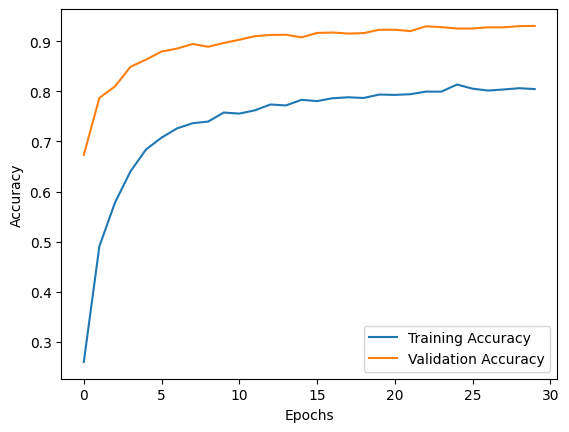

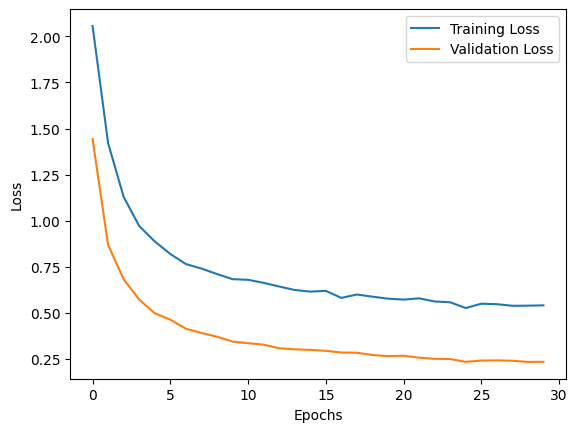

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Definindo os padrões de dígitos de 0 a 9 em uma matriz 8x8
digit_patterns = {
    0: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    1: np.array([
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ], dtype="float32"),

    2: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ], dtype="float32"),

    3: np.array([
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    4: np.array([
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0]
    ], dtype="float32"),

    5: np.array([
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    6: np.array([
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    7: np.array([
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0]
    ], dtype="float32"),

    8: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]
    ], dtype="float32"),

    9: np.array([
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0]
    ], dtype="float32")
}

# Função para aplicar ruído binário a uma imagem
def add_binary_noise(image, noise_level=0.025):
    noisy_image = image.copy()
    num_pixels = image.size
    num_noise_pixels = int(noise_level * num_pixels)

    # Seleciona aleatoriamente os índices dos pixels a serem invertidos
    indices = random.sample(range(num_pixels), num_noise_pixels)
    for idx in indices:
        x, y = divmod(idx, image.shape[1])
        noisy_image[x, y] = 1 - noisy_image[x, y]

    return noisy_image

# Gerar dados de treinamento
X_train = []
y_train = []

# Para cada dígito em digit_patterns, geramos múltiplas variações ruidosas
num_variations = 1000  # Número de variações ruidosas para cada dígito
noise_level = 0.2      # Nível de ruído (0 a 100%)

for label, digit_image in digit_patterns.items():
    for _ in range(num_variations):
        noisy_image = add_binary_noise(digit_image, noise_level=noise_level)
        X_train.append(noisy_image)
        y_train.append(label)

# Converter os dados para arrays numpy e normalizar as entradas
X_train = np.array(X_train).reshape(-1, 8, 8, 1)  # Redimensionar para o formato (N, 8, 8, 1)
y_train = to_categorical(y_train, num_classes=10)  # Converter rótulos para one-hot encoding

# Separar dados de validação
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # Construção do modelo mais SIMPLES
# model = Sequential([
    # Conv2D(16, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    # MaxPooling2D((2, 2)),
    # Dropout(0.25),  # Dropout para evitar overfitting
    # Flatten(),
    # Dense(16, activation='relu'),
    # Dropout(0.5),
    # Dense(10, activation='softmax')  # 10 classes para os dígitos de 0 a 9
# ])

# Construção do modelo com maior complexidade e camadas adicionais de Dropout
model = Sequential([
    Input(shape=(8, 8, 1)),  # Define apenas o `input_shape` sem o `batch_shape`
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

model.summary()

# Salvar o modelo treinado
model.save("digit_classifier_cnn.h5")
#model.save('digit_classifier_cnn.keras')
print("Modelo treinado e salvo como 'digit_classifier_cnn.h5'.")

# Visualização dos gráficos de perda e acurácia
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



16/16 - 0s - loss: 0.2536 - accuracy: 0.9220 - 84ms/epoch - 5ms/step

Test Loss: 0.25360185
Test Accuracy: 0.92199999
16/16 [==============================] - 0s 3ms/step


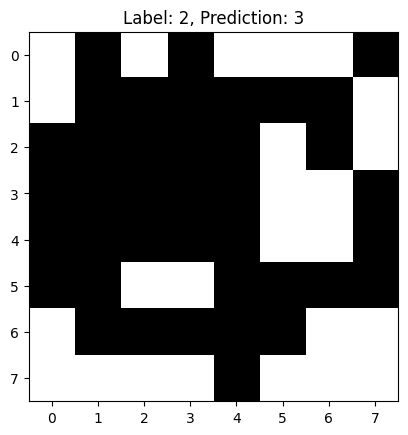

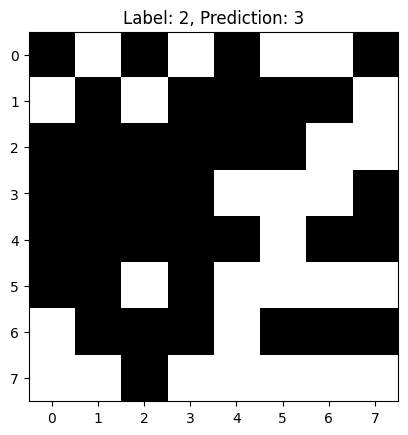

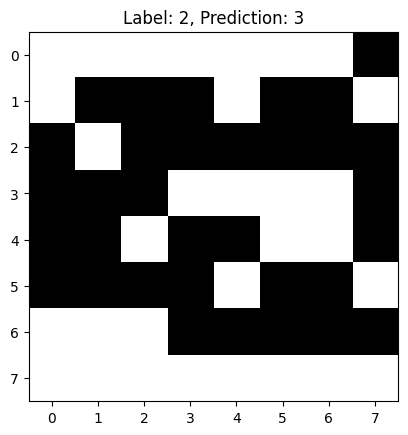

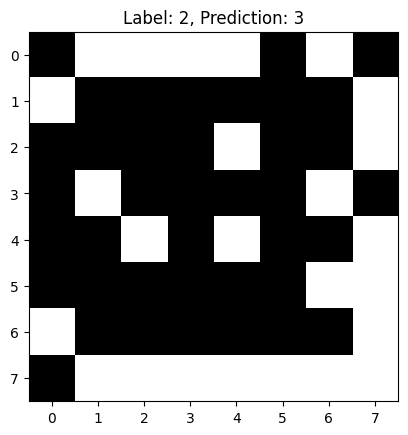

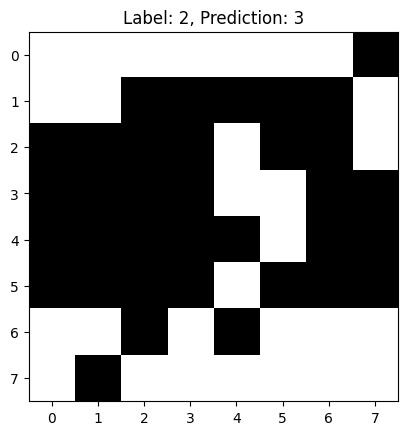

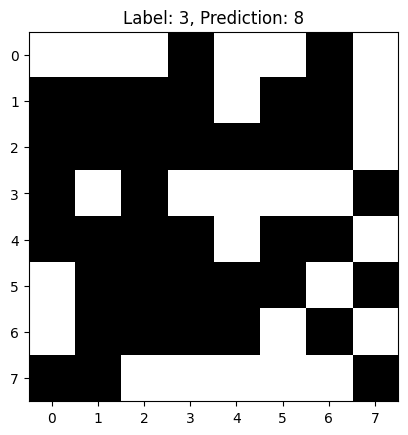

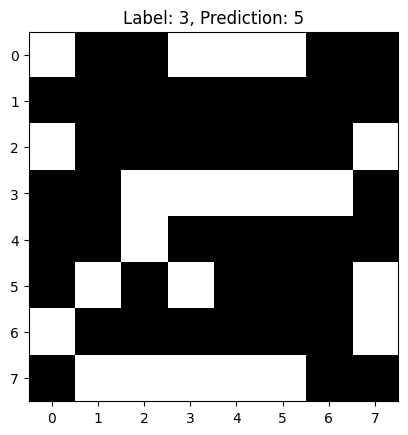

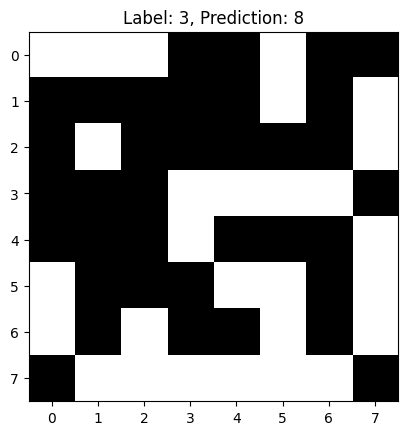

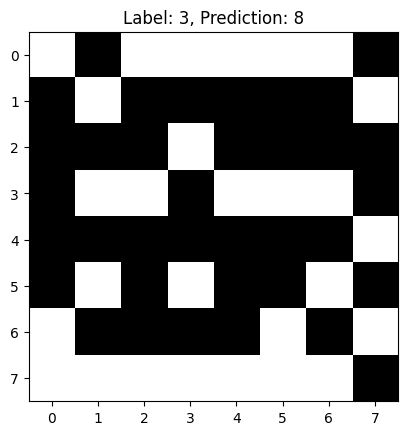

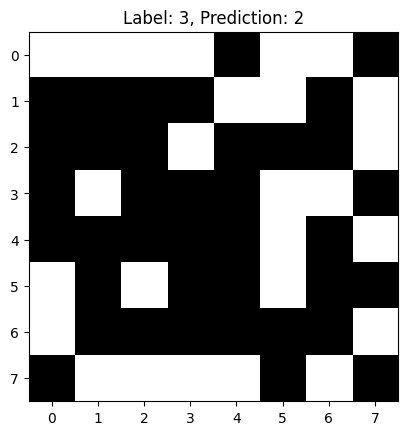

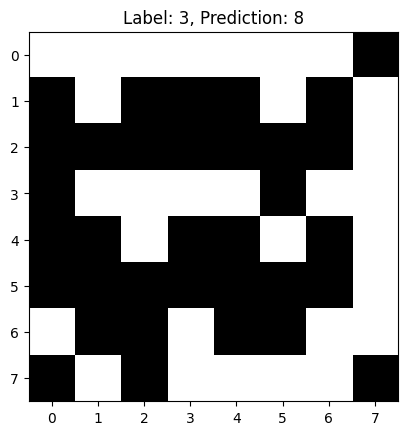

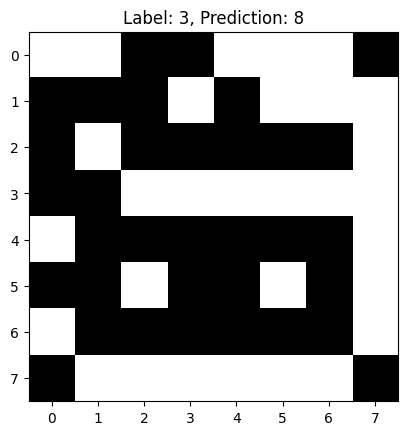

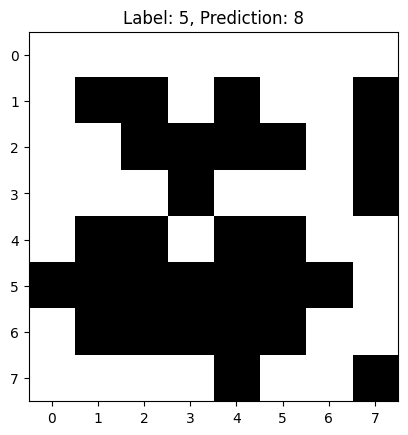

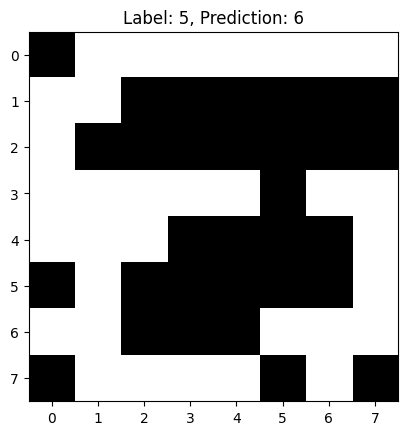

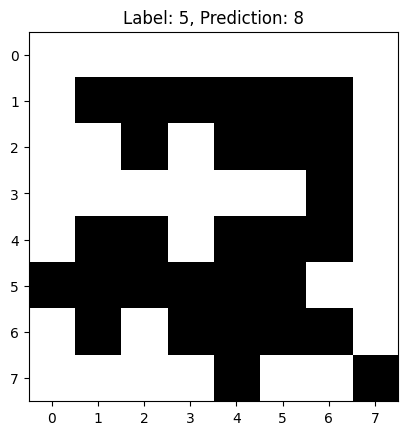

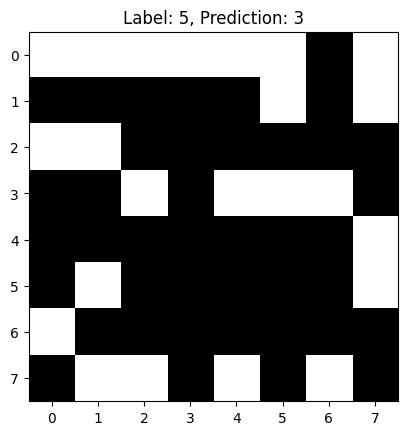

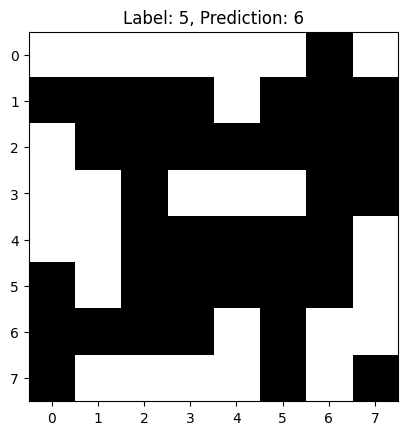

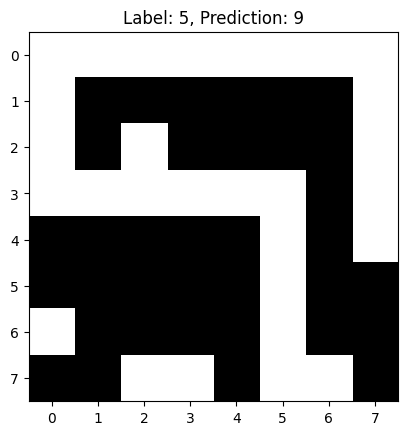

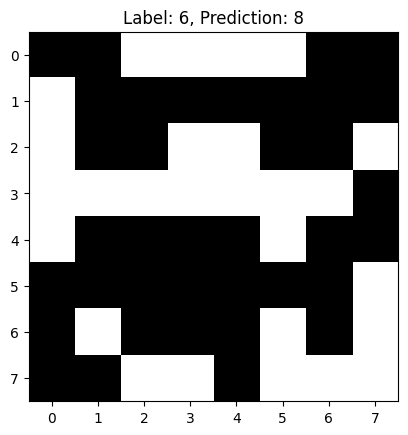

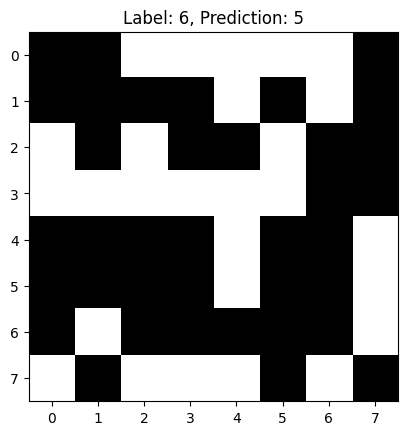

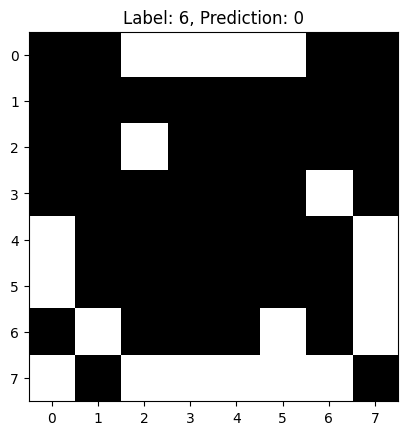

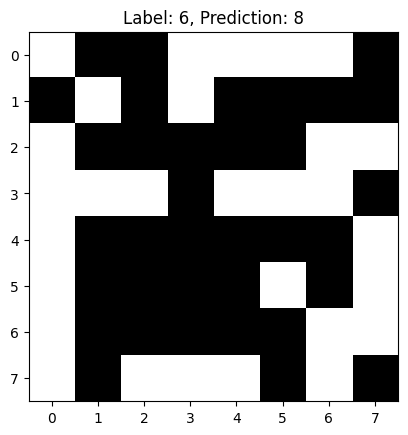

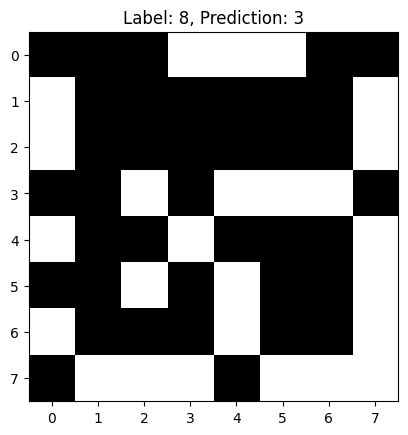

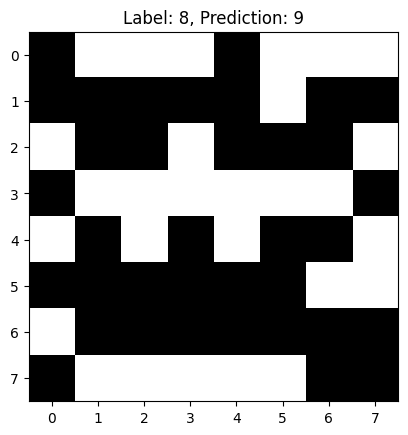

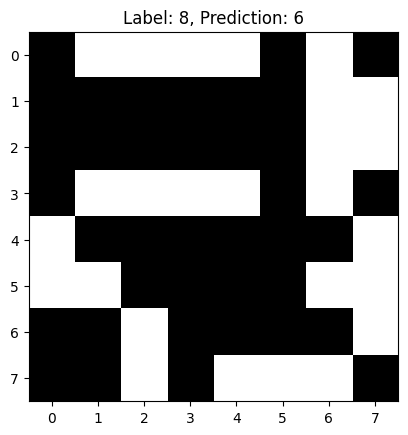

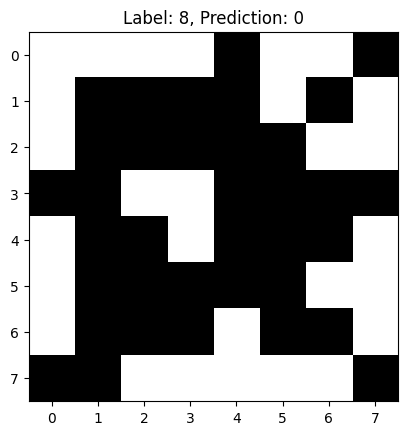

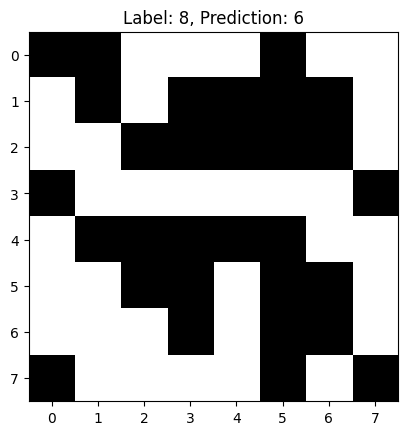

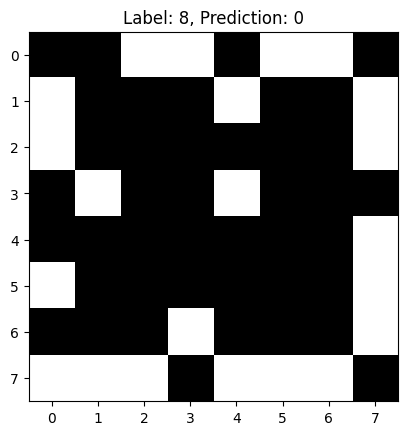

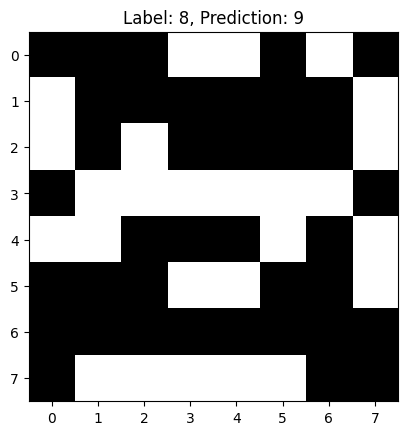

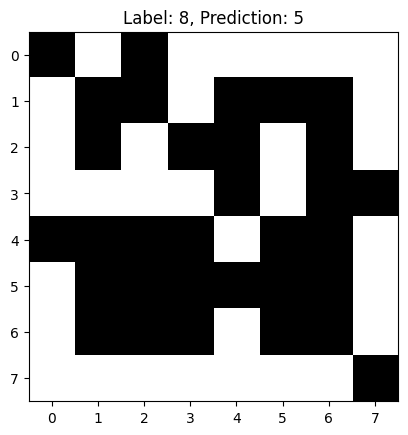

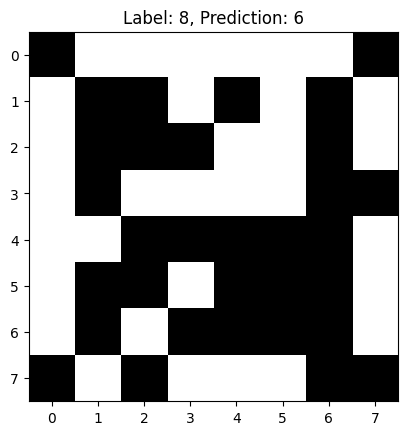

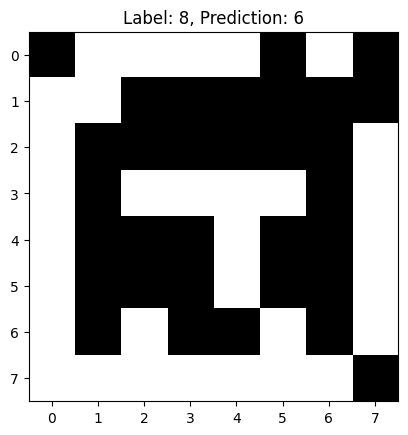

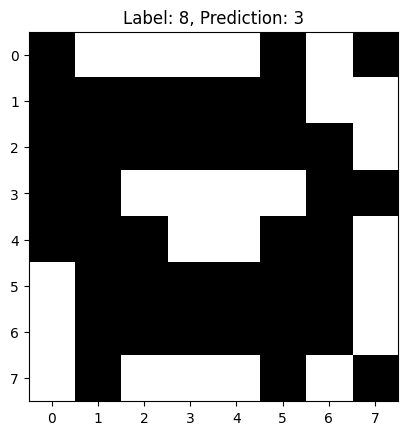

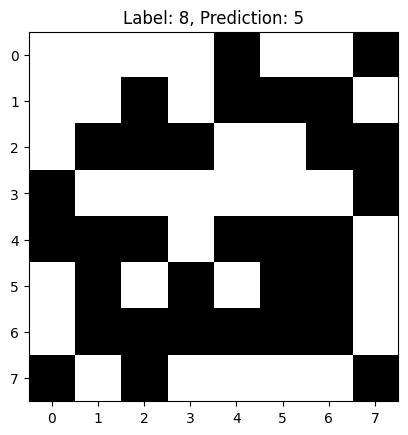

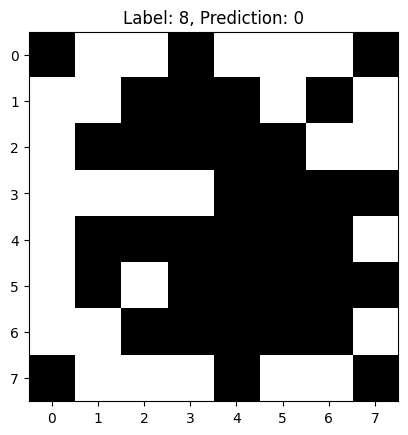

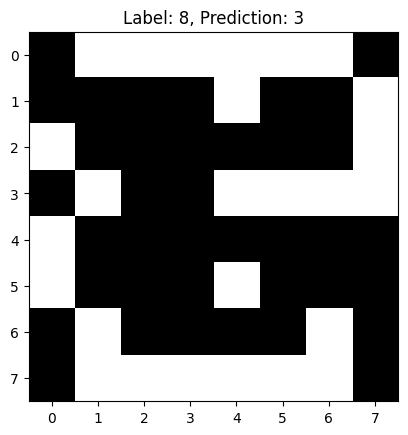

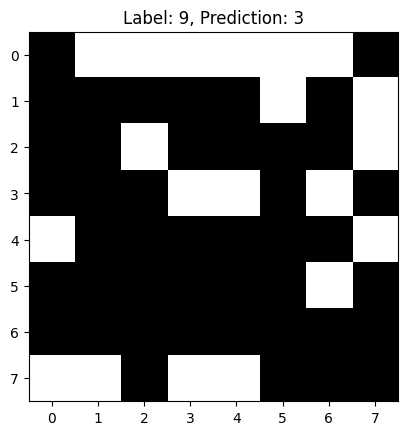

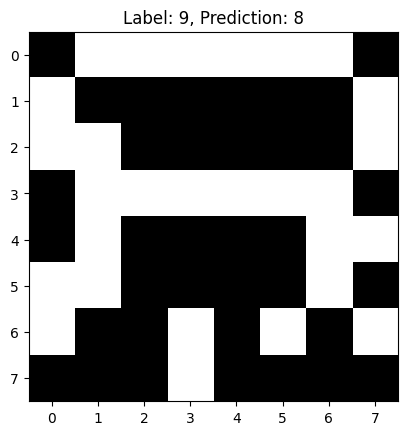

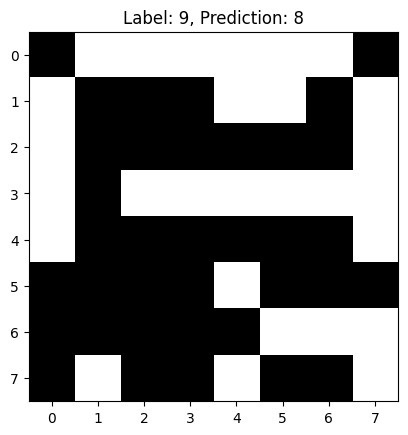

Arquivos de teste salvos


In [3]:
# Geração de dados de teste inéditos, similar ao conjunto de dados de treinamento
# Vamos gerar novos exemplos de dígitos de 0 a 9 com ruído para testar a rede
num_test_samples = 500
x_test = []
y_test = []


#[ ]

for label, digit_image in digit_patterns.items():
    for _ in range(num_test_samples // 10):  # Dividir igualmente entre os 10 dígitos
        noisy_image = add_binary_noise(digit_image, noise_level=noise_level)  # Função que aplica ruído ao padrão do dígito
        x_test.append(noisy_image)
        y_test.append(label)

# Convertendo para numpy arrays e ajustando para formato de entrada da rede
x_test = np.array(x_test).reshape(-1, 8, 8, 1)  # Reshape para (n_samples, altura, largura, canais)
y_test = np.array(y_test)

# Normalizando os dados para o intervalo [0, 1]
x_test = x_test / 1.0

# Convertendo os rótulos para o formato categórico
y_test = to_categorical(y_test, num_classes=10)

# Avaliando o modelo com o conjunto de dados de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Loss: {test_loss:.8f}")
print(f"Test Accuracy: {test_accuracy:.8f}")

# Previsão em novos exemplos de teste
predictions = model.predict(x_test)

# Visualizando algumas previsões
#import matplotlib.pyplot as plt

# num_samples_to_show = 5
# for i in range(num_samples_to_show):
    # plt.imshow(x_test[i+300].reshape(8, 8), cmap='gray')
    # plt.title(f"Label: {np.argmax(y_test[i+300])}, Prediction: {np.argmax(predictions[i+300])}")
    # plt.show()

# Visualizando apenas as previsões ERRADAS! (Tive que aumentar o npumero de testes para 10 000)
for i in range(len(x_test)):
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])

    # Mostra a imagem apenas se a predição estiver incorreta
    if true_label != predicted_label:
        plt.imshow(x_test[i].reshape(8, 8), cmap='gray')
        plt.title(f"Label: {true_label}, Prediction: {predicted_label}")
        plt.show()



#Script para salvar input_data
import numpy as np
from datetime import datetime

def save_data_to_csv(filename, X, y=None):
    # Supondo que X seja um array de forma (n_amostras, 65)
    # Ajuste para 64 características (8x8)
    X_resized = X[:, :64]  # Reduz para 64 características, ajustando para 8x8
    X_reshaped = X_resized.reshape(-1, 8, 8, 1)  # Reformata para (n_amostras, 8, 8, 1)

    # Quantidade de linhas de dados
    num_samples = X_reshaped.shape[0]

    # Obter estatísticas para a linha de cabeçalho
    min_val = np.min(X_resized)
    max_val = np.max(X_resized)
    mean_val = np.mean(X_resized)
    std_val = np.std(X_resized)

    # Abrir o arquivo CSV para escrita
    with open(filename, 'w') as file:
        # Escrever as 4 primeiras linhas do cabeçalho
        hora_atual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"# file created : {hora_atual}\n")
        file.write(f"# dtype=float32\n")
        file.write(f"# original model features - {num_samples}/10\n")  # Alterado para num_samples
        file.write(f"# ({X_reshaped.shape[0]}, 8, 8, 1)/float32, min/max=[{max_val},{min_val}], mean/std=[{mean_val},{std_val}], input_0\n")

        # Escrever os dados
        for i in range(X_reshaped.shape[0]):
            # Flatten a imagem 8x8 para uma linha de 64 valores
            input_data = X_reshaped[i].flatten()  # Torna a imagem 8x8 em um vetor de 64 elementos
            # Converte os valores de cada entrada para notação científica
            input_data_str = ",".join([f"{value:.18e}" for value in input_data])

            # Escreve a linha no arquivo sem adicionar rótulo (se y for None)
            file.write(f"{input_data_str}\n")

# Salvar dados de saída
save_data_to_csv("inpu_test_data.csv", x_test)


def save_labels_to_csv(filename, y_test):
    # Quantidade de linhas de dados (amostras)
    num_samples = y_test.shape[0]

    # Estatísticas dos dados para o cabeçalho
    min_val = np.min(y_test)
    max_val = np.max(y_test)
    mean_val = np.mean(y_test)
    std_val = np.std(y_test)

    # Abrir o arquivo CSV para escrita
    with open(filename, 'w') as file:
        # Escrever as 4 primeiras linhas do cabeçalho com a quantidade dinâmica de linhas
        hora_atual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"# file created : {hora_atual}\n")
        file.write(f"# dtype=float32\n")
        file.write(f"# c-model features - {num_samples}/500\n")  # Alterado para num_samples
        file.write(f"# ({y_test.shape[0]}, 1, 1, 10)/float32, min/max=[{min_val:.3f},{max_val:.3f}], mean/std=[{mean_val:.3f},{std_val:.3f}], dense_1\n")

        # Escrever os dados dos rótulos
        for i in range(y_test.shape[0]):
            # Flatten o vetor categórico para uma linha de 10 elementos
            label_data = y_test[i].flatten()  # Convertendo o formato (1, 1, 10) para (10,)

            # Converte os valores de cada entrada para notação científica com 18 casas decimais
            label_data_str = ",".join([f"{value:.18e}" for value in label_data])

            # Escreve a linha no arquivo
            file.write(f"{label_data_str}\n")

# salvar os rótulos no arquivo "labels_data.csv"
save_labels_to_csv("labels_data.csv", y_test)

print("Arquivos de teste salvos")
